In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/sreenu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**PART 6: Models with combined Title and Description features**

**(A) Concatenation Model**

Get the Title and Description classes defined earlier

In [2]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.util import bigrams

class General_Text:
    def create_traindf(csv_file, remove_stop_words=(True, True), apply_stemming=(True, False), use_bigrams=(True, True)):
        df = pd.read_csv(csv_file)
        df = df[['Class Index', 'Title', 'Description']]
        
        stop_words = set(stopwords.words('english'))
        stemmer = PorterStemmer()
        
        def preprocess_title(text):
            # text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)  # Remove numbers
            text = text.lower()
            tokens = text.split()
            
            if remove_stop_words[0]:
                tokens = [token for token in tokens if token not in stop_words]
            if apply_stemming[0]:
                tokens = [stemmer.stem(token) for token in tokens]
            if use_bigrams[0]:
                bigram_tokens = ['_'.join(bigram) for bigram in bigrams(tokens)]
                return tokens + bigram_tokens
            return tokens
        
        def preprocess_description(text):
            # text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)  # Remove numbers
            text = text.lower()
            tokens = text.split()
            
            if remove_stop_words[1]:
                tokens = [token for token in tokens if token not in stop_words]
            if use_bigrams[1]:
                bigram_tokens = ['_'.join(bigram) for bigram in bigrams(tokens)]
                return tokens + bigram_tokens
            return tokens
        
        df['Tokenized Title'] = df['Title'].apply(preprocess_title)
        df['Tokenized Description'] = df['Description'].apply(preprocess_description)
        df['Tokenized Text'] = df['Tokenized Title'] + df['Tokenized Description']
        
        return df
    
    def create_testdf(csv_file, remove_stop_words=(True, True), apply_stemming=(True, False), use_bigrams=(True, True)):
        df = pd.read_csv(csv_file)
        trueOutput = df[['Class Index']].copy()
        
        stop_words = set(stopwords.words('english'))
        stemmer = PorterStemmer()
        
        def preprocess_title(text):
            # text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)  # Remove numbers
            text = text.lower()
            tokens = text.split()
            
            if remove_stop_words[0]:
                tokens = [token for token in tokens if token not in stop_words]
            if apply_stemming[0]:
                tokens = [stemmer.stem(token) for token in tokens]
            if use_bigrams[0]:
                bigram_tokens = ['_'.join(bigram) for bigram in bigrams(tokens)]
                return tokens + bigram_tokens
            return tokens
        
        def preprocess_description(text):
            # text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
            text = re.sub(r'\d+', '', text)  # Remove numbers
            text = text.lower()
            tokens = text.split()
            
            if remove_stop_words[1]:
                tokens = [token for token in tokens if token not in stop_words]
            if use_bigrams[1]:
                bigram_tokens = ['_'.join(bigram) for bigram in bigrams(tokens)]
                return tokens + bigram_tokens
            return tokens
        
        df['Tokenized Title'] = df['Title'].apply(preprocess_title)
        df['Tokenized Description'] = df['Description'].apply(preprocess_description)
        df['Tokenized Text'] = df['Tokenized Title'] + df['Tokenized Description']
        df['Predicted'] = 0
        
        return df, trueOutput

In [3]:
def calculate_accuracy(predicted_df, trueOutput):
    # Compare the Predicted column with the true class labels
    correct_predictions = (predicted_df['Predicted'] == trueOutput['Class Index']).sum()
    total_predictions = len(trueOutput)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

In [4]:
csv_file_train = '../data/Q1/train.csv'  # Relative path from the notebook to the CSV file
csv_file_test = '../data/Q1/test.csv'  # Relative path from the notebook to the CSV file
# Get the best description text processing
train_df_gen = General_Text.create_traindf(csv_file_train)
test_df_gen, trueOutput_test_gen = General_Text.create_testdf(csv_file_test)
trainacc_df_gen, trueOutput_train_gen = General_Text.create_testdf(csv_file_train)

In [5]:
from naive_bayes import NaiveBayes

# Initialize and train the Naive Bayes model
nb = NaiveBayes()
nb.fit(train_df_gen, smoothening=1.0, class_col="Class Index", text_col="Tokenized Text")

# Calculate the train accuracy
nb.predict(trainacc_df_gen, text_col="Tokenized Text", predicted_col = "Predicted")
train_accuracy = calculate_accuracy(trainacc_df_gen, trueOutput_train_gen)
print(f"Train Accuracy: {train_accuracy:.3f}%")

# Calculate the test accuracy
nb.predict(test_df_gen, text_col="Tokenized Text", predicted_col = "Predicted")
test_accuracy = calculate_accuracy(test_df_gen, trueOutput_test_gen)
print(f"Test Accuracy: {test_accuracy:.3f}%")

Train Accuracy: 96.349%
Test Accuracy: 91.105%


In [ ]:
from naive_bayes import NaiveBayes

# Initialize and train the Naive Bayes model
nb = NaiveBayes()
nb.fit_dual(train_df_gen, smoothening=1.0)

# Calculate the train accuracy
nb.predict_dual(trainacc_df_gen)
train_accuracy = calculate_accuracy(trainacc_df_gen, trueOutput_train_gen)
print(f"Train Accuracy: {train_accuracy:.3f}%")

# Calculate the test accuracy
nb.predict_dual(test_df_gen)
test_accuracy = calculate_accuracy(test_df_gen, trueOutput_test_gen)
print(f"Test Accuracy: {test_accuracy:.3f}%")

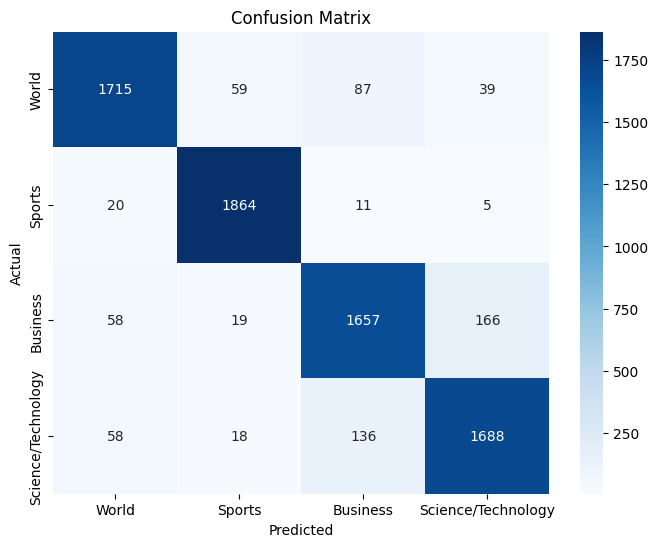

In [6]:
# Define class names
class_names = ["World", "Sports", "Business", "Science/Technology"]

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get actual and predicted labels
y_pred = test_df_gen["Predicted"]  # Actual class labels
y_true = trueOutput_test_gen["Class Index"]    # Predicted class labels from your Naive Bayes model

# Step 2: Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 3: Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
import re
import pandas as pd
import nltk

# Force download of necessary NLTK data - run these lines first
nltk.download('punkt', quiet=False)
nltk.download('stopwords', quiet=False)

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, trigrams

class General_Text_Imp:
    def create_traindf(csv_file, remove_stop_words=(True, True), apply_stemming=(True, False), use_ngrams=(True, True)):
        df = pd.read_csv(csv_file)
        df = df[['Class Index', 'Title', 'Description']]
        
        # Get stopwords only after downloading
        stop_words = set(stopwords.words('english'))
        stemmer = PorterStemmer()
        
        def preprocess_title(text):
            if not isinstance(text, str) or pd.isna(text):
                return []
            
            # Simple tokenization as fallback if NLTK fails
            try:
                text = re.sub(r'\d+', '', str(text))
                text = text.lower()
                tokens = word_tokenize(text)
            except:
                # Fallback to simple tokenization
                text = re.sub(r'\d+', '', str(text))
                text = text.lower()
                tokens = text.split()
            
            if remove_stop_words[0]:
                tokens = [token for token in tokens if token not in stop_words]
            
            if apply_stemming[0]:
                tokens = [stemmer.stem(token) for token in tokens]
            
            # For title, use unigrams and trigrams
            result_tokens = tokens.copy()
            
            if use_ngrams[0] and len(tokens) > 2:
                trigram_tokens = ['_'.join(trigram) for trigram in trigrams(tokens)]
                result_tokens.extend(trigram_tokens)
                    
            return result_tokens
        
        def preprocess_description(text):
            if not isinstance(text, str) or pd.isna(text):
                return []
            
            # Simple tokenization as fallback if NLTK fails
            try:
                text = re.sub(r'\d+', '', str(text))
                text = text.lower()
                tokens = word_tokenize(text)
            except:
                # Fallback to simple tokenization
                text = re.sub(r'\d+', '', str(text))
                text = text.lower()
                tokens = text.split()
            
            if remove_stop_words[1]:
                tokens = [token for token in tokens if token not in stop_words]
            
            if apply_stemming[1]:
                tokens = [stemmer.stem(token) for token in tokens]
            
            # For description, use unigrams and bigrams only
            result_tokens = tokens.copy()
            
            if use_ngrams[1] and len(tokens) > 1:
                bigram_tokens = ['_'.join(bigram) for bigram in bigrams(tokens)]
                result_tokens.extend(bigram_tokens)
                    
            return result_tokens
        
        df['Tokenized Title'] = df['Title'].apply(preprocess_title)
        df['Tokenized Description'] = df['Description'].apply(preprocess_description)
        df['Tokenized Text'] = df.apply(lambda x: x['Tokenized Title'] + x['Tokenized Description'], axis=1)
        
        return df
    
    def create_testdf(csv_file, remove_stop_words=(True, True), apply_stemming=(True, False), use_ngrams=(True, True)):
        df = pd.read_csv(csv_file)
        trueOutput = df[['Class Index']].copy()
        
        # Get stopwords only after downloading
        stop_words = set(stopwords.words('english'))
        stemmer = PorterStemmer()
        
        def preprocess_title(text):
            if not isinstance(text, str) or pd.isna(text):
                return []
            
            # Simple tokenization as fallback if NLTK fails
            try:
                text = re.sub(r'\d+', '', str(text))
                text = text.lower()
                tokens = word_tokenize(text)
            except:
                # Fallback to simple tokenization
                text = re.sub(r'\d+', '', str(text))
                text = text.lower()
                tokens = text.split()
            
            if remove_stop_words[0]:
                tokens = [token for token in tokens if token not in stop_words]
            
            if apply_stemming[0]:
                tokens = [stemmer.stem(token) for token in tokens]
            
            # For title, use unigrams and trigrams
            result_tokens = tokens.copy()
            
            if use_ngrams[0] and len(tokens) > 2:
                trigram_tokens = ['_'.join(trigram) for trigram in trigrams(tokens)]
                result_tokens.extend(trigram_tokens)
                    
            return result_tokens
        
        def preprocess_description(text):
            if not isinstance(text, str) or pd.isna(text):
                return []
            
            # Simple tokenization as fallback if NLTK fails
            try:
                text = re.sub(r'\d+', '', str(text))
                text = text.lower()
                tokens = word_tokenize(text)
            except:
                # Fallback to simple tokenization
                text = re.sub(r'\d+', '', str(text))
                text = text.lower()
                tokens = text.split()
            
            if remove_stop_words[1]:
                tokens = [token for token in tokens if token not in stop_words]
            
            if apply_stemming[1]:
                tokens = [stemmer.stem(token) for token in tokens]
            
            # For description, use unigrams and bigrams only
            result_tokens = tokens.copy()
            
            if use_ngrams[1] and len(tokens) > 1:
                bigram_tokens = ['_'.join(bigram) for bigram in bigrams(tokens)]
                result_tokens.extend(bigram_tokens)
                    
            return result_tokens
        
        df['Tokenized Title'] = df['Title'].apply(preprocess_title)
        df['Tokenized Description'] = df['Description'].apply(preprocess_description)
        df['Tokenized Text'] = df.apply(lambda x: x['Tokenized Title'] + x['Tokenized Description'], axis=1)
        df['Predicted'] = 0
        
        return df, trueOutput

[nltk_data] Downloading package punkt to /home/sreenu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sreenu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
train_df_gen_2 = General_Text_Imp.create_traindf(csv_file_train)
test_df_gen_2, trueOutput_test_gen_2 = General_Text_Imp.create_testdf(csv_file_test)
trainacc_df_gen_2, trueOutput_train_gen_2 = General_Text_Imp.create_testdf(csv_file_train)

In [17]:
from naive_bayes import NaiveBayes

# Initialize and train the Naive Bayes model
nb = NaiveBayes()
nb.fit(train_df_gen_2, smoothening=1.0, class_col="Class Index", text_col="Tokenized Text")

# Calculate the train accuracy
nb.predict(trainacc_df_gen_2, text_col="Tokenized Text", predicted_col = "Predicted")
train_accuracy_2 = calculate_accuracy(trainacc_df_gen_2, trueOutput_train_gen_2)
print(f"Train Accuracy: {train_accuracy_2:.3f}%")

# Calculate the test accuracy
nb.predict(test_df_gen_2, text_col="Tokenized Text", predicted_col = "Predicted")
test_accuracy_2 = calculate_accuracy(test_df_gen_2, trueOutput_test_gen_2)
print(f"Test Accuracy: {test_accuracy_2:.3f}%")

Train Accuracy: 96.442%
Test Accuracy: 91.039%
